## Análise de dados de RH

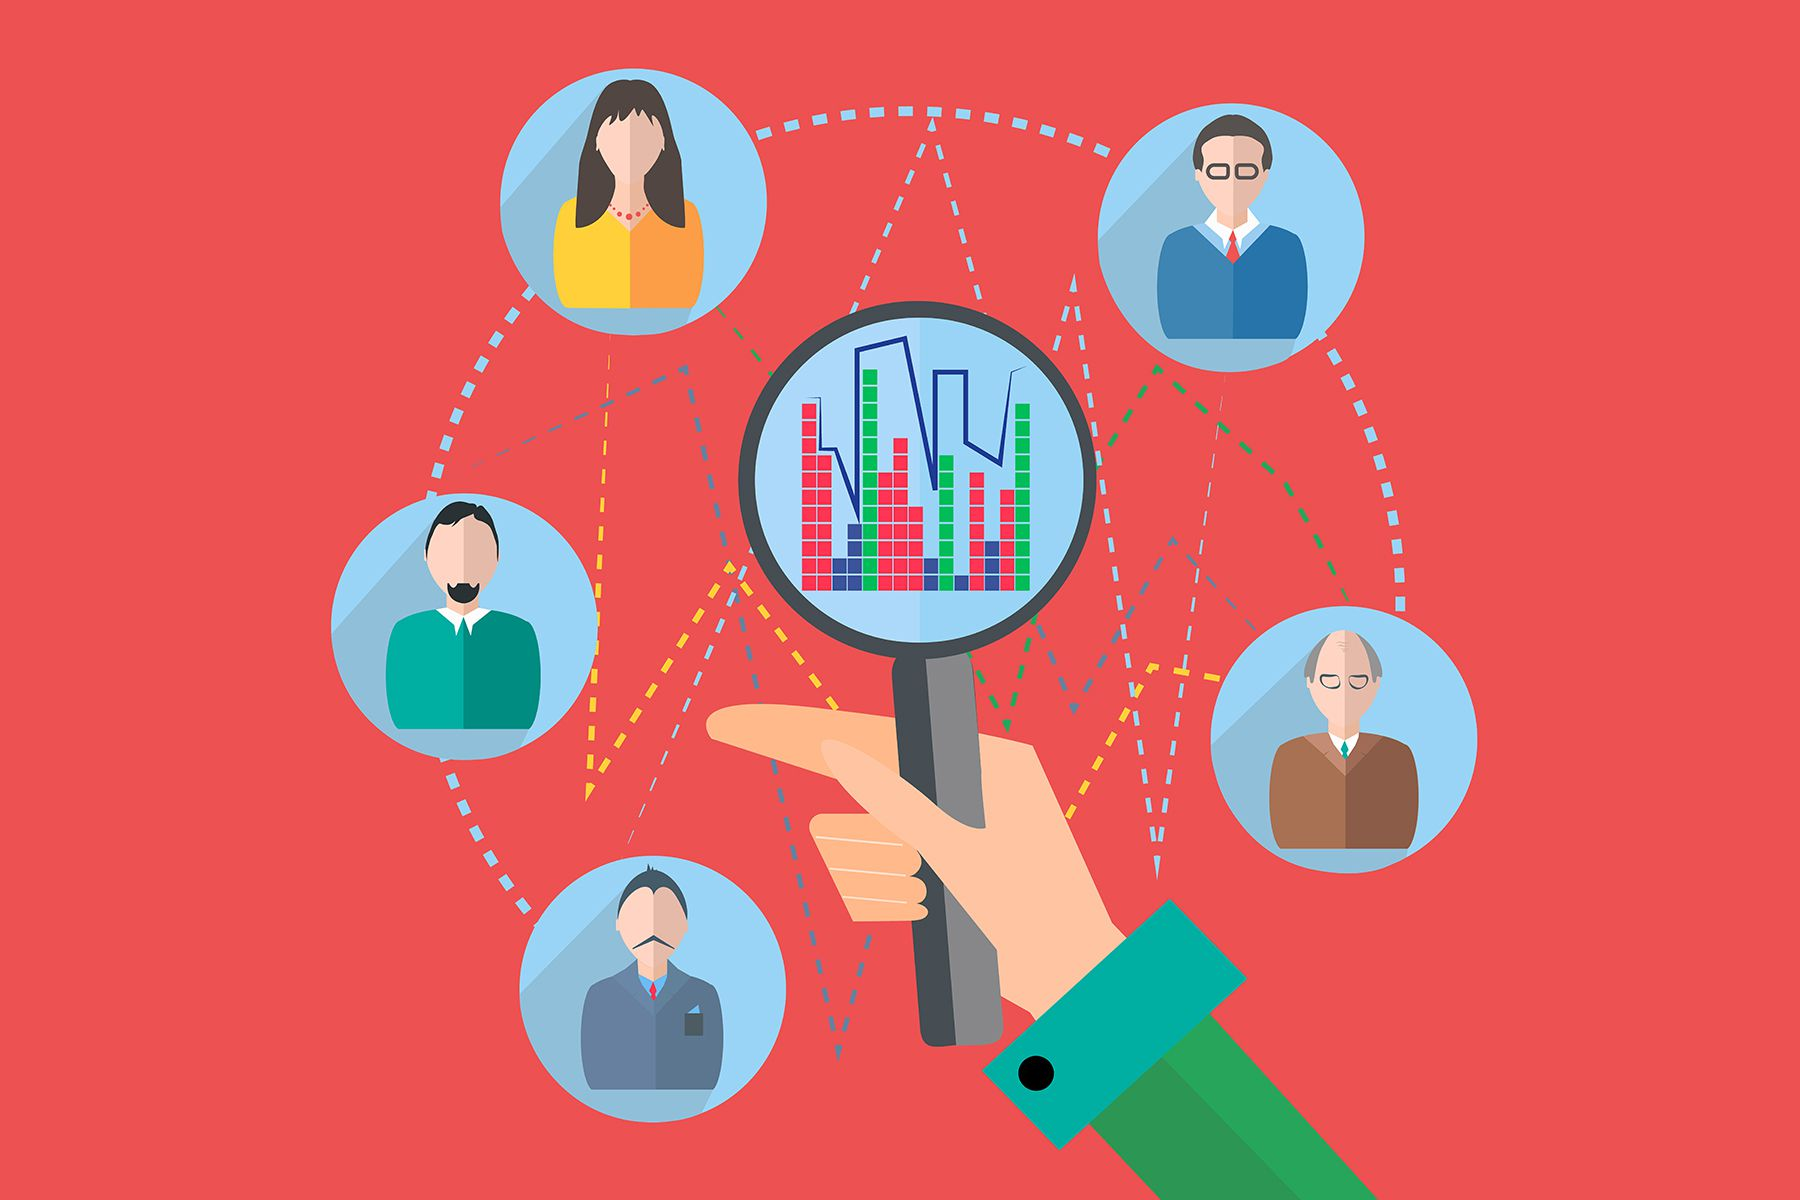

In [3]:
from IPython.display import Image
Image(r"C:\Users\aliso\OneDrive\Área de Trabalho\Projetos\RH.jpg", width=750)

###### Definição do problema de negócio e técnicas

Uma  empresa  de  consultoria que  atua  em  Big  Data  e  Data  Science  deseja  contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa. 

Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou estão apenas fazendo o treinamento para retornarem ao mercado à procura de um novo emprego. O objetivo é  contratar  os  profissionais  com  perfil  adequado, a  fim  dereduzir  o  custo  e  o  tempode contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos. 

Informações  relacionadas  a  dados  demográficos,  educação e experiência  estão disponíveis no conjunto de dados fornecido.

Nosso objetivo será realizar um extenso trabalho de análise nos dados, compreender como  estão  organizados,  realizar  limpeza e  transformação  dos  dados  conforme  necessário, detectar eventuais padrões e diagnósticose ao final emitir um parecer com um resumo sobre os dados.

# Instalando e carregando os pacotes

In [1]:
# Verificando versão python

from platform import python_version
print('Versão da linguagem python usada neste projeto: ', python_version())

Versão da linguagem python usada neste projeto:  3.9.13


In [3]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import category_encoders as ce

# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Temporal
from datetime import datetime

In [4]:
# Versões dos pacotes

%reload_ext watermark
%watermark -a "Alison Araújo" --iversions
print(f"Data de início do projeto: {datetime.today().strftime('%Y-%m-%d')}")

Author: Alison Araújo

IPython          : 7.31.1
seaborn          : 0.13.0
ctypes           : 1.1.0
sys              : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
scipy            : 1.11.3
matplotlib       : 3.4.3
category_encoders: 2.2.2
numpy            : 1.23.5
pandas           : 1.3.3
plotly           : 5.3.1
json             : 2.0.9
missingno        : 0.5.0

Data de início do projeto: 2023-11-23


## Carregando os dados

In [5]:
# Carregando o dataset

df = pd.read_csv(r'C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap03\dataset\aug_train.csv')

In [6]:
# Shape do dataframe

df.shape

(19158, 14)

In [7]:
# Amostra aleatória dos dados

df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
7661,12922,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,<1,NaN,NaN,4,124,1.0
10267,25527,city_83,0.923,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,100-500,Pvt Ltd,1,26,0.0
14515,8553,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,5000-9999,Pvt Ltd,1,71,0.0
5078,18784,city_16,0.910,Male,No relevent experience,Full time course,Masters,STEM,11,5000-9999,NGO,>4,90,0.0
15691,26788,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,16,500-999,Public Sector,>4,58,0.0
7022,3687,city_103,0.920,Male,No relevent experience,Full time course,Graduate,Business Degree,2,100-500,Pvt Ltd,1,43,0.0
15781,1933,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,<1,100-500,Pvt Ltd,never,32,0.0
17704,32488,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,24,1.0
11732,19787,city_21,0.624,NaN,Has relevent experience,NaN,Graduate,STEM,4,100-500,Pvt Ltd,3,11,0.0
15468,2167,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,500-999,Funded Startup,never,4,0.0


In [8]:
# Colunas

df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
# Estrutura primitiva da tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise exploratória

In [10]:
# Descrevendo os dados não numéricos

df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [11]:
# Descrevendo os dados numéricos

# OBS: Não desejamos calcular estatísticas descritivas do id ou variável alvo.

round(df.describe().drop(columns = ['enrollee_id', 'target']),2)

,city_development_index,training_hours
count,19158.00,19158.00
mean,0.83,65.37
std,0.12,60.06
min,0.45,1.00
25%,0.74,23.00
50%,0.90,47.00
75%,0.92,88.00
max,0.95,336.00


### Visualizando as variáveis categóricas

In [12]:
# Trazendo o índice de cada variável para mapeamento

print([x for x in enumerate(df.columns)])

[(0, 'enrollee_id'), (1, 'city'), (2, 'city_development_index'), (3, 'gender'), (4, 'relevent_experience'), (5, 'enrolled_university'), (6, 'education_level'), (7, 'major_discipline'), (8, 'experience'), (9, 'company_size'), (10, 'company_type'), (11, 'last_new_job'), (12, 'training_hours'), (13, 'target')]


In [13]:
# Listando somente as variáveis categóricas

list(df.columns[3:12])

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

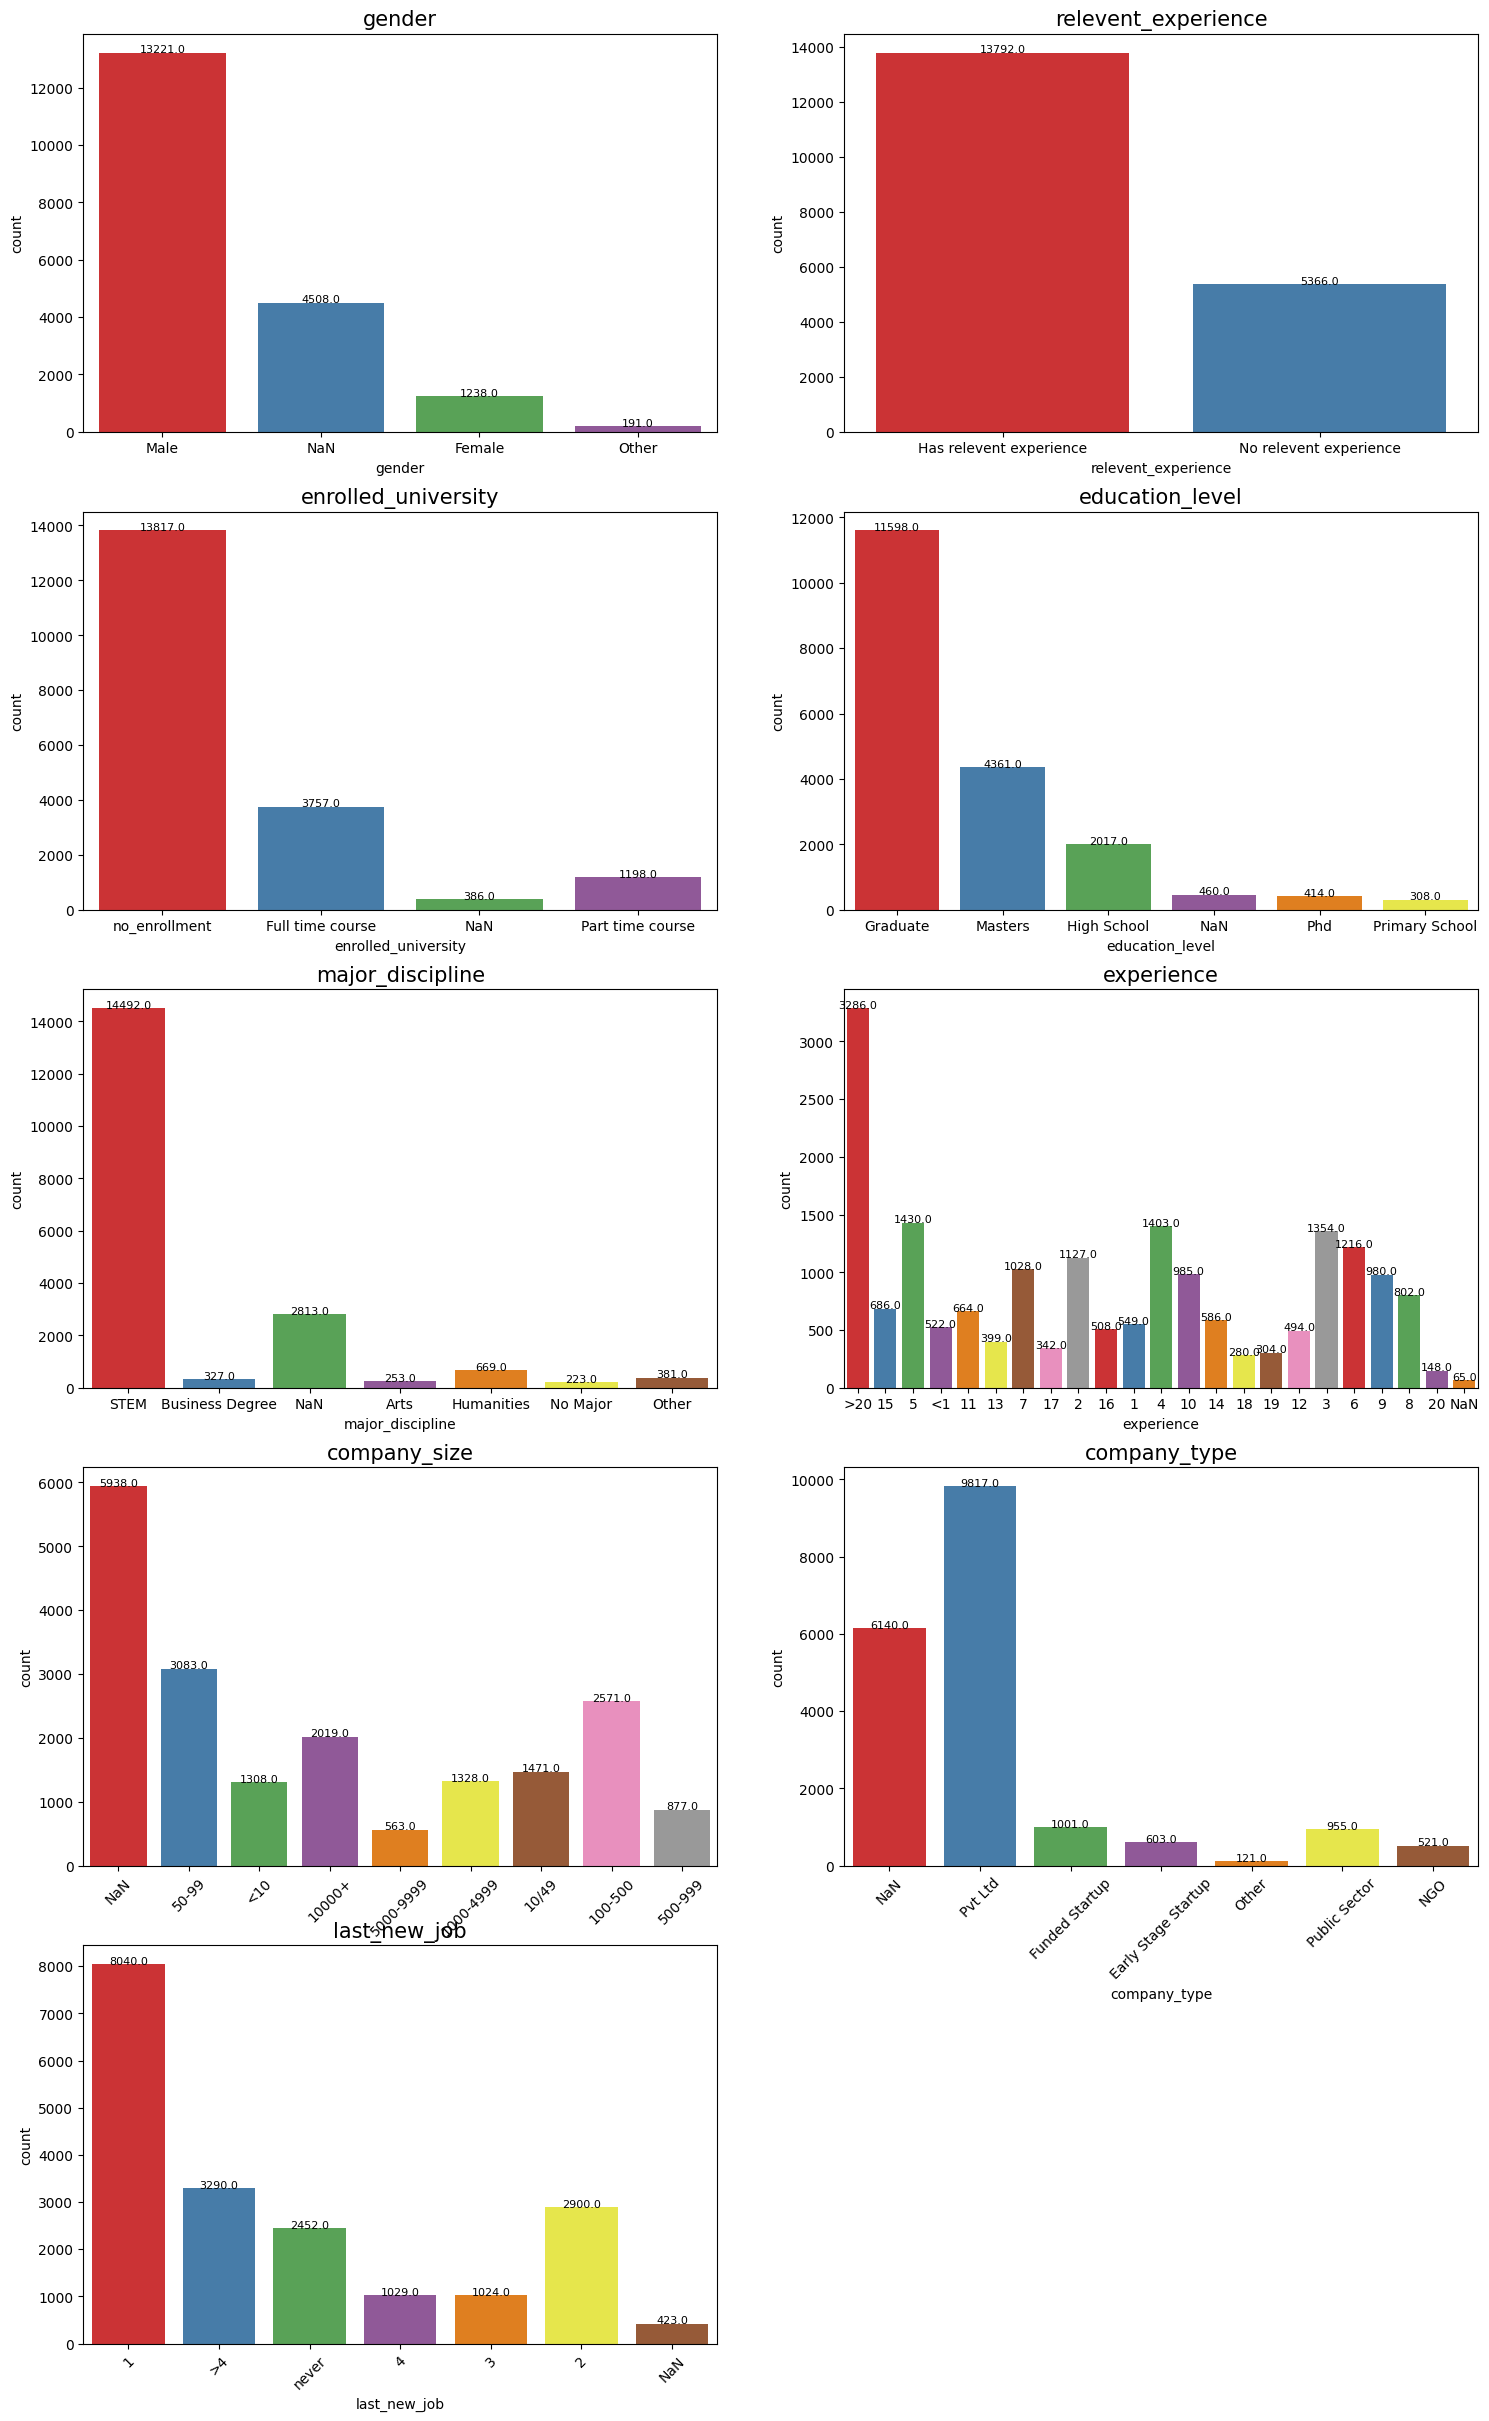

In [14]:
from IPython.display import display, HTML
# Plot

# Área de plotagem
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns[3:12])

# Contador
A = 0

# Loop
for i, col in enumerate(column_list):
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data=df.fillna('NaN'), x=col, palette='Set1')
    plt.title(col, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=8)
    if A >= 7:
        plt.xticks(rotation=45)

# Remove a barra de rolagem lateral
display(HTML("<style>div.output_scroll { height: auto !important; }</style>"))
        
# Exibe a figura
plt.show()

## Verificando a distribuição das variáveis numéricas

In [15]:
# Descrevendo os dados numéricos

df.describe(include = [int, float]).drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


### Visualizando as variáveis numéricas

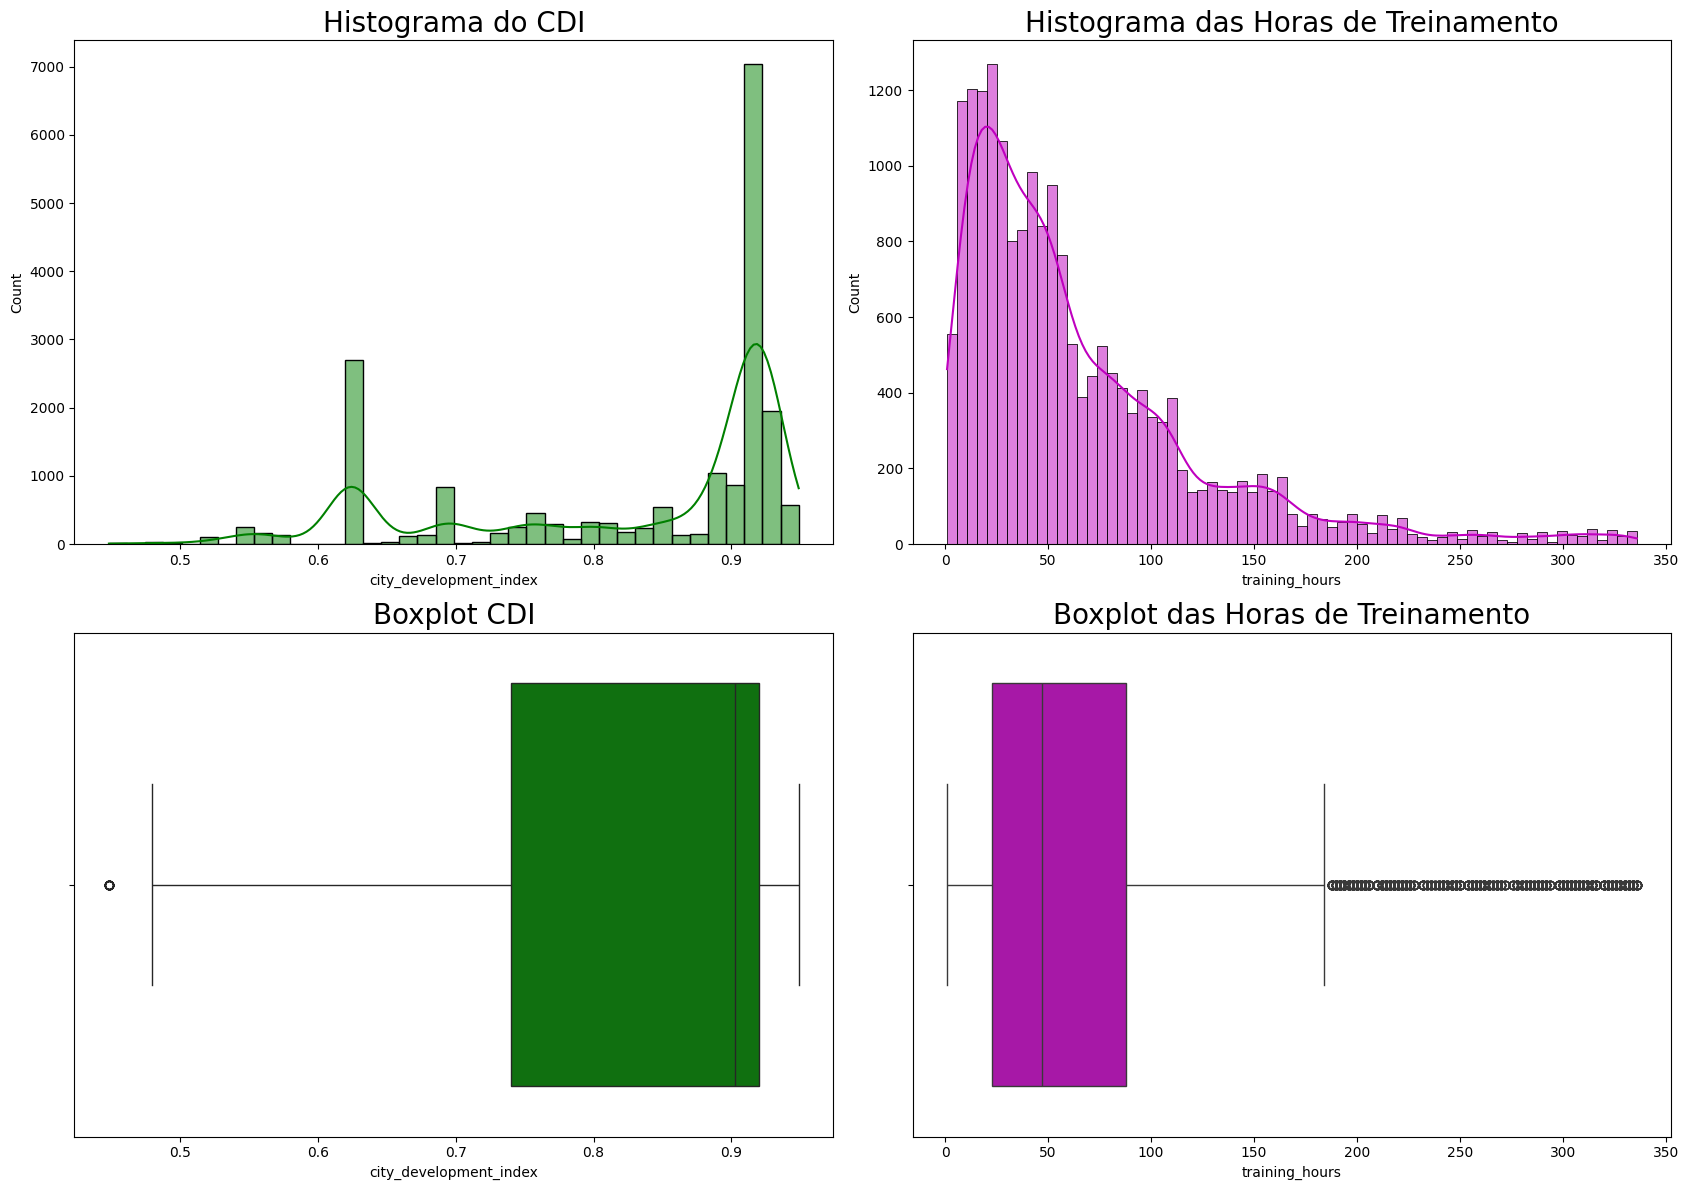

In [16]:
# Área de plotagem
plt.figure(figsize = (17, 12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = 'g')
plt.title('Histograma do CDI', fontsize = 20)     
    
plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = 'm')
plt.title('Histograma das Horas de Treinamento', fontsize = 20)
           
# Subplots com boxplots
plt.subplot(223)
sns.boxplot(x=df['city_development_index'], color = 'g', linewidth=1)
plt.title("Boxplot CDI", fontsize = 20)

plt.subplot(224)
sns.boxplot(x=df['training_hours'], color = 'm', linewidth=1)
plt.title('Boxplot das Horas de Treinamento', fontsize = 20)

# Melhor visualizacao
plt.tight_layout()

# Exibe a figura
plt.show()

###### Teste de normalidade da distribuição

In [17]:
# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop para checar o p valor
for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal\n')

city_development_index : Distribuição Não Normal

training_hours : Distribuição Não Normal



##### Correlação dos dados

###### Correlação de Spearman entre variáveis numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar)

In [18]:
df.sample(10)

# Após olhar o dicionário de dados, observamos que a variável experience 
# pode ter uma adequação na sua estrutura não primitiva, de categórica para numérica 


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
4933,3082,city_83,0.923,Male,Has relevent experience,no_enrollment,Masters,STEM,19,10000+,Pvt Ltd,1,37,0.0
1340,10648,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Funded Startup,never,111,0.0
5981,17054,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000+,Pvt Ltd,>4,40,0.0
14317,7006,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,2,262,0.0
10798,31126,city_91,0.691,NaN,Has relevent experience,Full time course,Graduate,STEM,4,10/49,Pvt Ltd,1,55,1.0
7162,21941,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,100-500,Pvt Ltd,3,47,1.0
15568,32983,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,1,10,0.0
13546,24258,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,6,<10,Pvt Ltd,>4,96,0.0
18879,32047,city_165,0.903,Male,Has relevent experience,no_enrollment,Graduate,Humanities,4,50-99,Public Sector,2,42,1.0
13015,2211,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,Other,10,NaN,NaN,2,70,0.0


In [19]:
# Cópia do dataframe

dataframe = df.copy()

In [20]:
# Contagem de frequência para a variável experience

dataframe['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [21]:
# Engenharia de atributo na variável experience

dataframe['experience'] = np.where(dataframe['experience'] == '<1', 1, dataframe['experience'])
dataframe['experience'] = np.where(dataframe['experience'] == '>20', 21, dataframe['experience'])
dataframe['experience'] = dataframe['experience'].astype(float)

# OBS: Na análise exploratória, observamos que a variável categórica frequência continha dados como >20 e <1. Então decidimos realizar a
# engenharia de atributo para que seja possível realizar a correlação de spearman, atribuindo a 1 para <1 e 21 para >20, além do parsing 
# primitivo de object para int por sem tratar de dados discreto

In [22]:
# Recontagem de frequência para a variável experience

dataframe['experience'].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [23]:
# Checando a estrutura primitiva da variável experience

print(dataframe['experience'].dtypes)

float64


In [24]:
# Contagem de frequência para a variável last_new_job

dataframe['last_new_job'].value_counts()

# Temos duas frequências que podem ser modificadas: >4, never. Neste caso optamos para aplicar engenharia de atributo de >4 para 5 e never para 0

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [25]:
# Engenharia de atributo na variável last_new_job

dataframe['last_new_job'] = np.where(dataframe['last_new_job'] == '>4', 5, dataframe['last_new_job'])
dataframe['last_new_job'] = np.where(dataframe['last_new_job'] == 'never', 0, dataframe['last_new_job'])
dataframe['last_new_job'] = dataframe['last_new_job'].astype(float)

In [26]:
# Checando a estrutura primitiva da variável last_new_job

print(dataframe['last_new_job'].dtypes)

float64


In [27]:
# Realizando a correçacao de spearman

dataframe.drop('enrollee_id', axis = 1).corr('spearman')

# A função corr por natureza já realiza a correlação somente com as variáveis numéricas. Apenas removemos a de ID pois não há interesse nela 
#vide que é apenas um índice

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


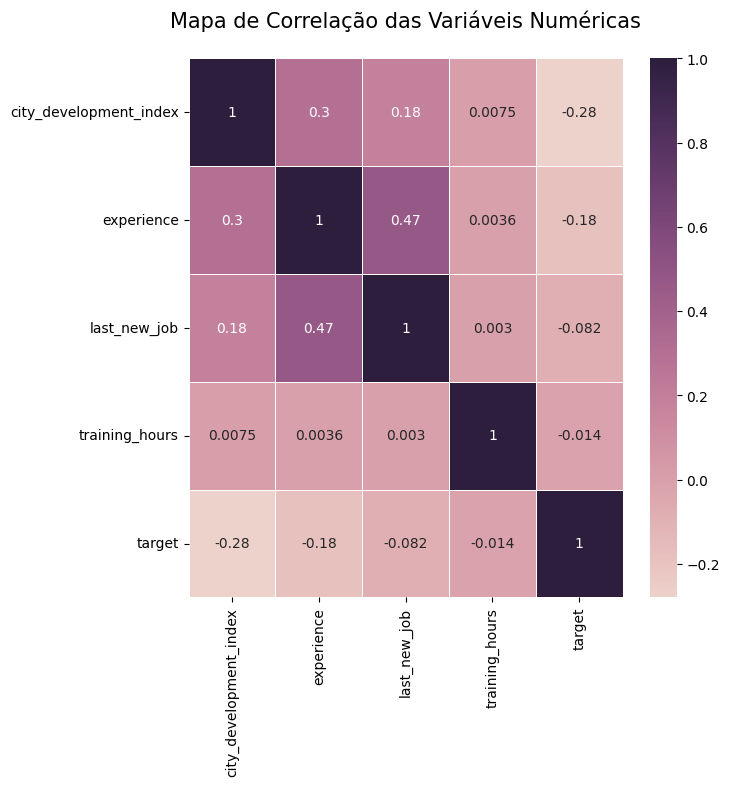

In [28]:
# Visualização da correlação com um heatmap

plt.figure(figsize = (7, 7))
sns.heatmap(dataframe.drop('enrollee_id', axis = 1).corr('spearman'), annot = True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5)
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize = 15)
plt.show()

###### Weight of Evidence (WOE) e Information Value (IV)



Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [29]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 1000x1500 with 0 Axes>

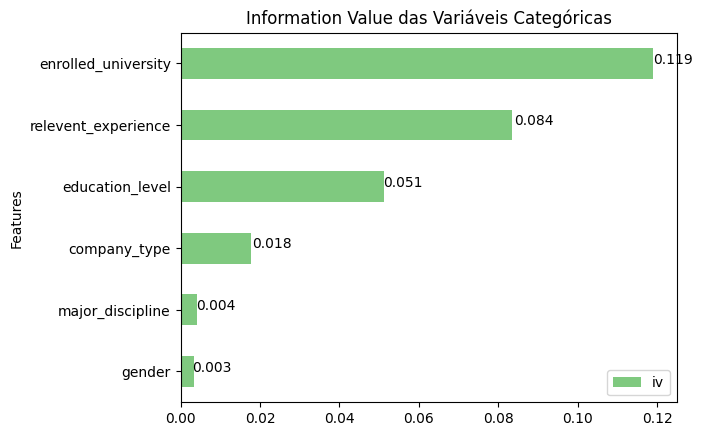

In [30]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,15))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

###### Identificando valores ausentes

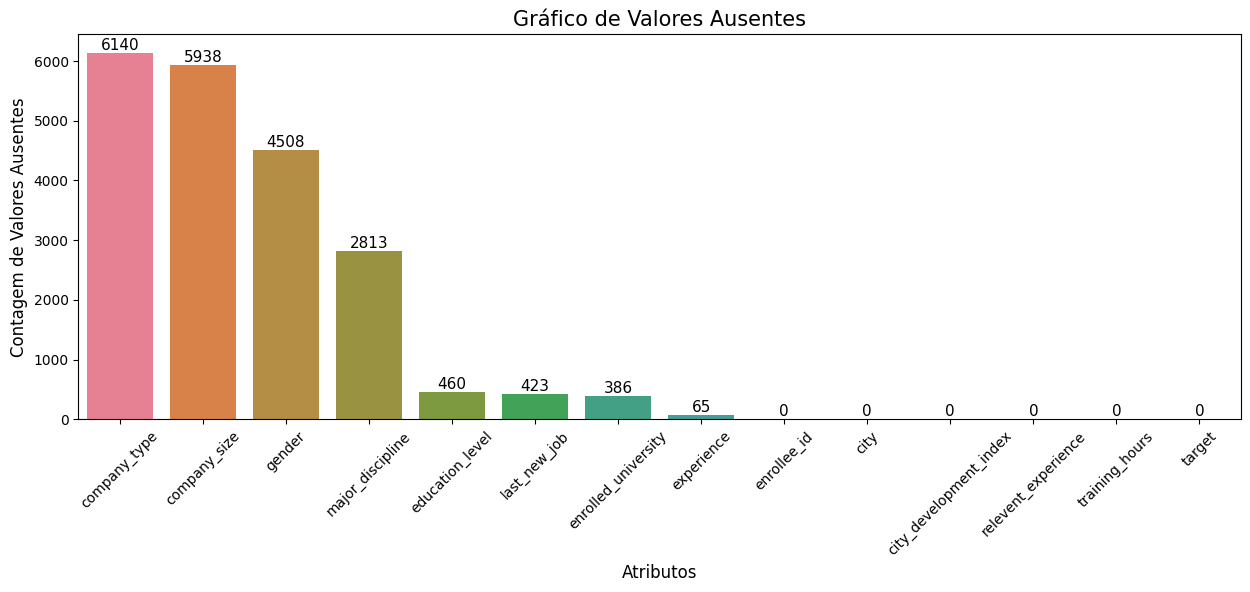

In [93]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Ordernando os valores do gráfico
null_df = null_df.sort_values(by=0, ascending=False)

# Criar a figura
plt.figure(figsize=(15, 5))

# Plot de barras
sns.barplot(x=null_df['index'], y=null_df[0], palette='husl')

# Configurações do gráfico
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title('Gráfico de Valores Ausentes', fontsize=15)

# Adicionar rótulos
for index, value in enumerate(null_df[0]):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

# Exibir o gráfico
plt.show()


###### Mapa de valores ausentes com seaborn

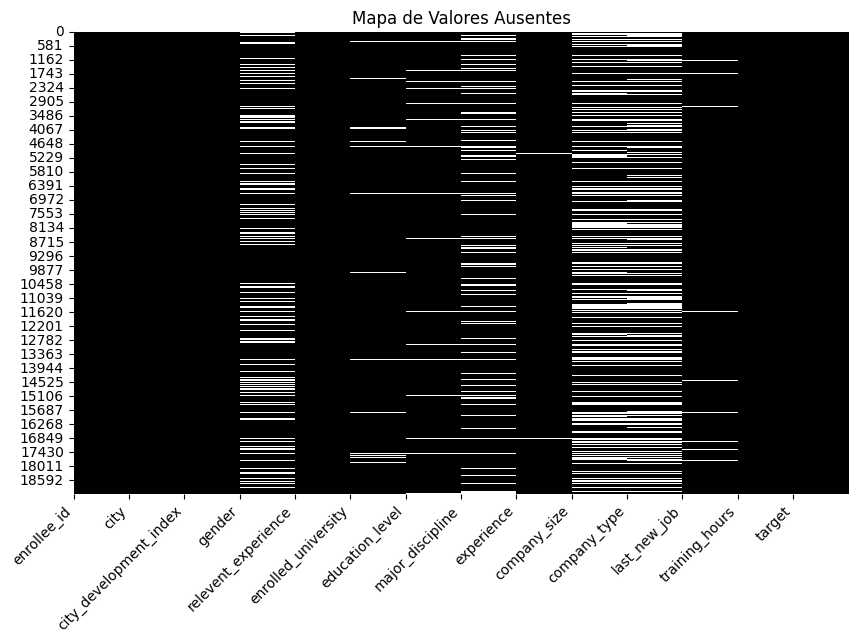

In [49]:
# DataFrame
df_nan = pd.DataFrame(df.isna().sum())

# Verificando se há valores ausentes
if df.isna().any().any():

    # Mapa de valor ausentes com seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='binary_r', cbar=False)
    plt.title('Mapa de Valores Ausentes')
    plt.xticks(ticks=range(df.shape[1]), labels=df.columns, rotation=45, ha='right')
    plt.show()
else:
    print('Não há valores ausentes no DataFrame.')


In [51]:
df_nan = pd.DataFrame(df.isna().sum())
display(df_nan.sort_values(by=df_nan.columns[0], ascending=False))

,0
company_type,6140
company_size,5938
gender,4508
major_discipline,2813
education_level,460
last_new_job,423
enrolled_university,386
experience,65
enrollee_id,0
city,0


##### Identificando valores duplicados

In [33]:
# Checando se há valores duplicados

df['enrollee_id'].duplicated().sum()

0

##### Identificando os dados desbalanceados

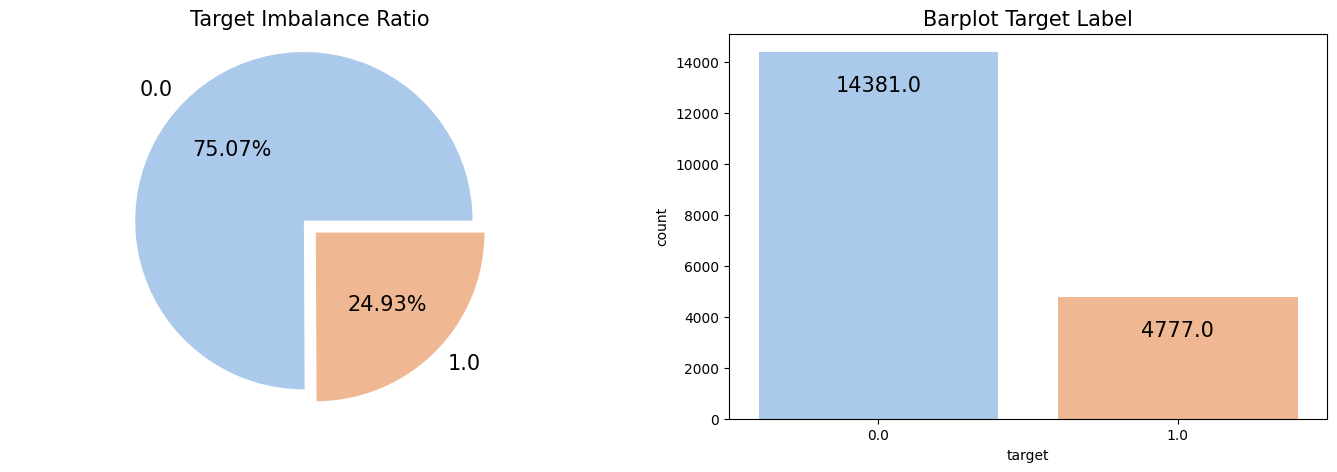

In [72]:
# Figura
plt.figure(figsize = (17, (100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        textprops={'fontsize':15},
        explode = (0,0.1), colors = ['#ABC9EA', '#EFB792'])

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)

ax = sns.countplot(data = df, x = 'target', palette = 'pastel')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'k', 
                size = 15)

Os dados estão desbalanceados em relação à variável target 

## Limpeza e Processamento dos Dados

##### Tratamento de valores ausentes

In [73]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [74]:
# Lista com as colunas que serão mantidas

# OBS: Será removida da nossa análise a coluna gender, vide que com base no IV, esta não possui
# um nível de correlação categórico significativo para o objeto de nosso estudo

colunas_manter = ['city_development_index',
                  'relevent_experience',
                  'enrolled_university',
                  'education_level',
                  'major_discipline',
                  'experience',
                  'company_type',
                  'target']

In [76]:
new_df = df[colunas_manter]
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


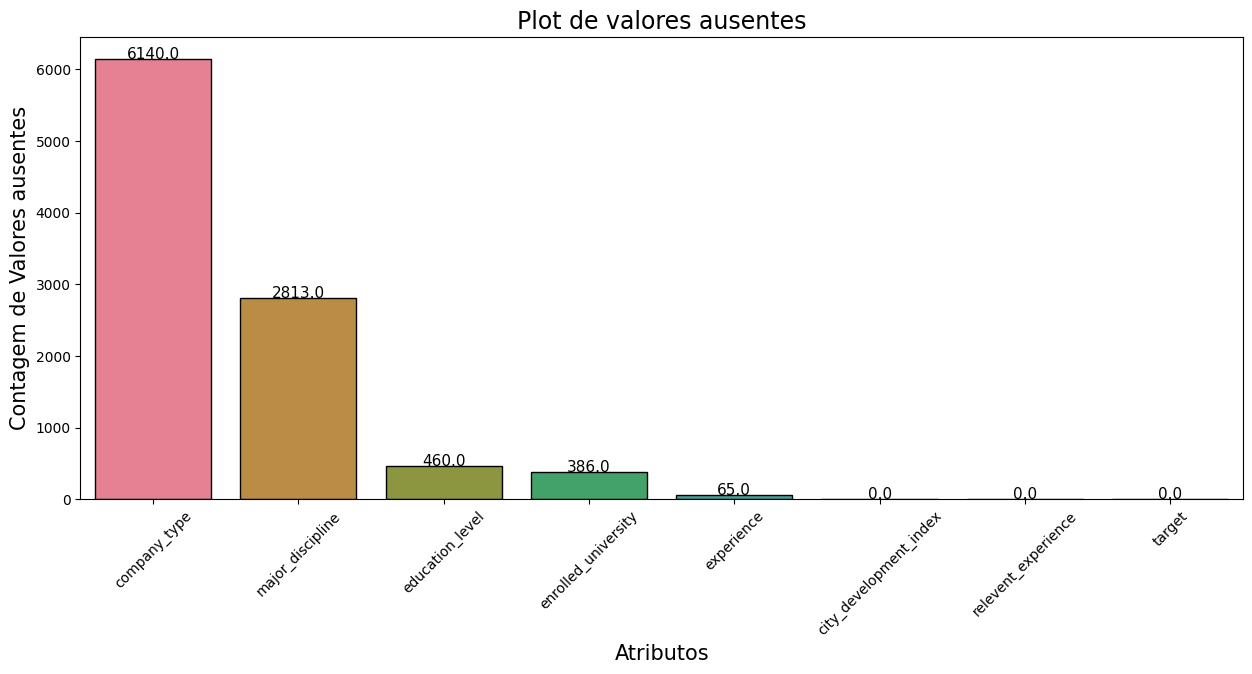

In [99]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Ordernando os valores do gráfico
null_df = null_df.sort_values(by=0, ascending=False)

# Área de plotagem
ax = plt.figure(figsize = (15, 6))

# Barplot
ax = sns.barplot(x=null_df['index'], y=null_df[0], edgecolor = 'k', palette = 'husl')
plt.xlabel('Atributos', fontsize = 15)
plt.ylabel('Contagem de Valores ausentes', fontsize = 15)
plt.xticks(rotation = 45)
plt.title('Plot de valores ausentes', fontsize = 17)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.4,
                 (p.get_height())),
                ha='center',
                color='k',
                size = 11)

plt.show()

# A partir do gráfico acima, temos um sentido acerca das variáveis que apresentam valores ausentes. 

###### Variável Major_discipline

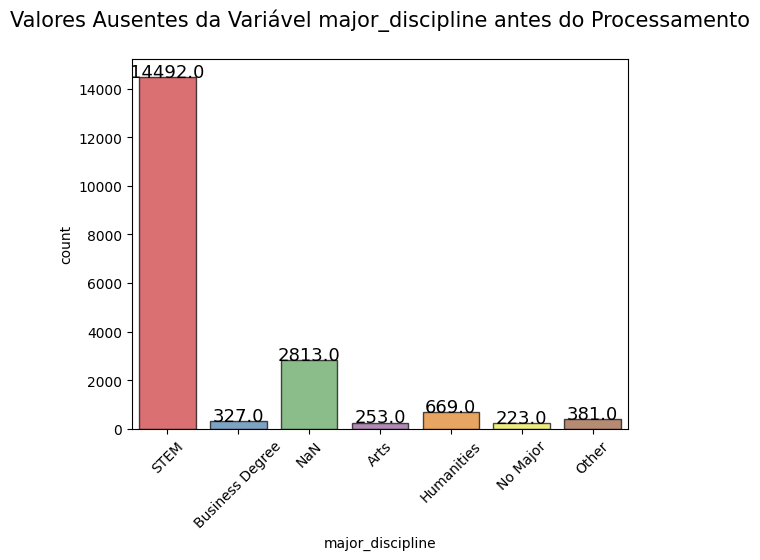

In [111]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black', palette='Set1')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 13)
plt.title("Valores Ausentes da Variável major_discipline antes do Processamento\n", fontsize = 15)
plt.show()

In [112]:
# Relação entre major_discipline x education_level

# Checando a proporcionalidade de valores com base na variável education_level

print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Dentre os registros com valores ausentes, vemos a proporção na variável education_level.

Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.

In [113]:
# Cria o índice

nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [114]:
# Imputação de valor ausente

new_df['major_discipline'][nan_index] = 'Non Degree'

In [120]:
# Checando a imputação

new_df[new_df['major_discipline'] == 'Non Degree'] 

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
6,0.920,Has relevent experience,no_enrollment,High School,Non Degree,5,Funded Startup,0.0
10,0.624,No relevent experience,Full time course,High School,Non Degree,2,NaN,1.0
13,0.624,No relevent experience,NaN,NaN,Non Degree,2,NaN,0.0
14,0.624,No relevent experience,Full time course,High School,Non Degree,5,NaN,0.0
25,0.855,No relevent experience,no_enrollment,High School,Non Degree,4,NaN,0.0
...,...,...,...,...,...,...,...,...
19134,0.920,Has relevent experience,Part time course,High School,Non Degree,12,Pvt Ltd,0.0
19140,0.920,No relevent experience,no_enrollment,Primary School,Non Degree,2,NaN,0.0
19142,0.776,Has relevent experience,no_enrollment,NaN,Non Degree,5,Early Stage Startup,0.0
19156,0.802,Has relevent experience,no_enrollment,High School,Non Degree,<1,Pvt Ltd,0.0


In [121]:
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)


Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

Na verificação acima, temos uma resultante de 28 valores NAN, ao realizar a filtragem abaixo, vemos que os valores correspondentes a NaN, são para aqueles alunos cujo education_level é igual a 'Masters' e 'Graduate'

In [134]:
# Tabela com os registros ausentes e o índice para enumeração

new_df[new_df['major_discipline'].isna()]['education_level'].sort_values().reset_index()

,index,education_level
0,13091,Graduate
1,18984,Graduate
2,18227,Graduate
3,18208,Graduate
4,17696,Graduate
5,17259,Graduate
6,17063,Graduate
7,16564,Graduate
8,16546,Graduate
9,19013,Graduate


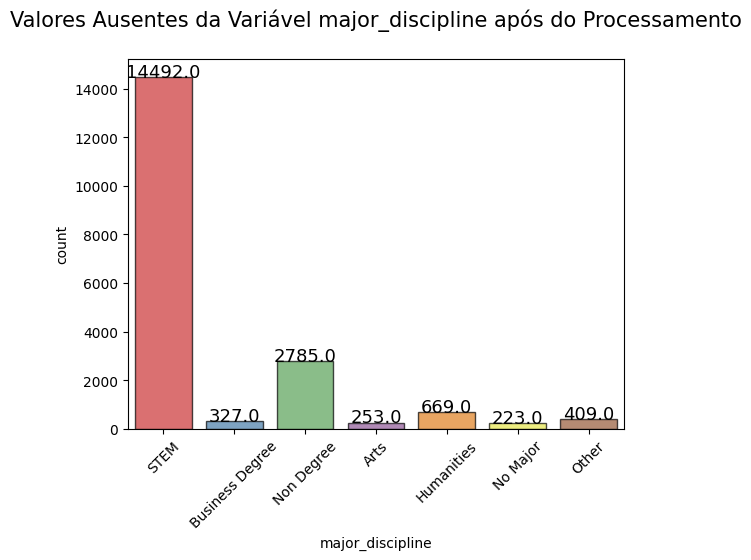

In [139]:
# Valores Ausentes da Variável major_discipline após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black', palette='Set1')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 13)
plt.title("Valores Ausentes da Variável major_discipline após do Processamento\n", fontsize = 15)
plt.show()

In [136]:
# Imputação com Other para aqueles que têm Graduate ou Masters no education level

new_df[new_df['major_discipline'].isna()] = 'Other'

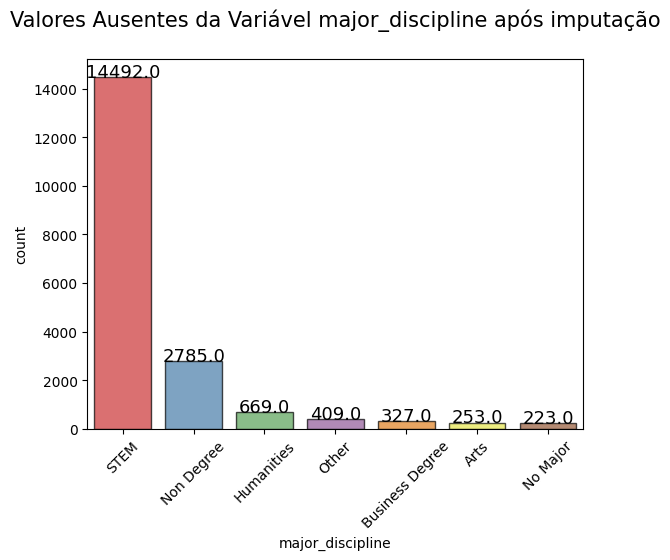

In [140]:
# Verificação após processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, order = new_df['major_discipline'].value_counts().index, edgecolor = 'black', palette='Set1')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 13)
plt.title("Valores Ausentes da Variável major_discipline após imputação\n", fontsize = 15)
plt.show()

In [141]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


###### Variável enrolled_university

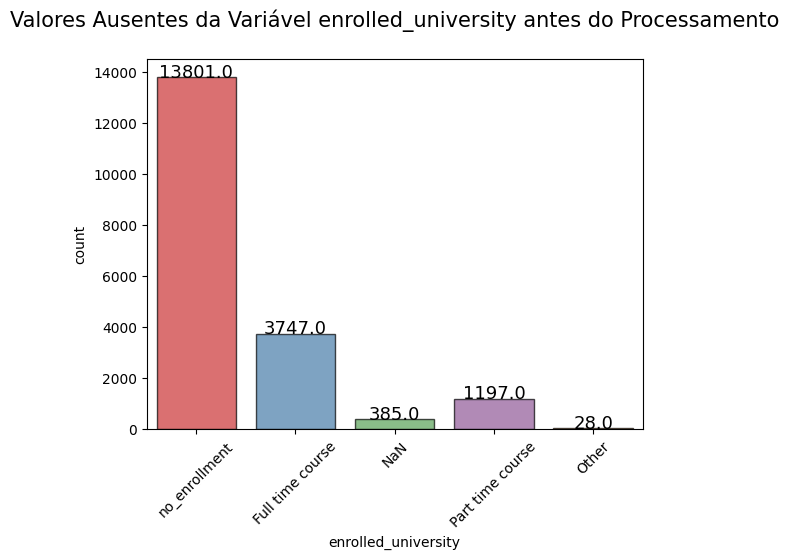

In [142]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black', palette='Set1')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 13)
plt.title("Valores Ausentes da Variável enrolled_university antes do Processamento\n", fontsize = 15)
plt.show()

In [144]:
# Relação entre enrolled_university x education_level

# Checando a proporcionalidade de valores com base na variável education_level

print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.

In [145]:
# Prepara o índice

nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [146]:
len(nan_index)

9

In [147]:
# Imputação de valores ausentes

new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [148]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [149]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [150]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

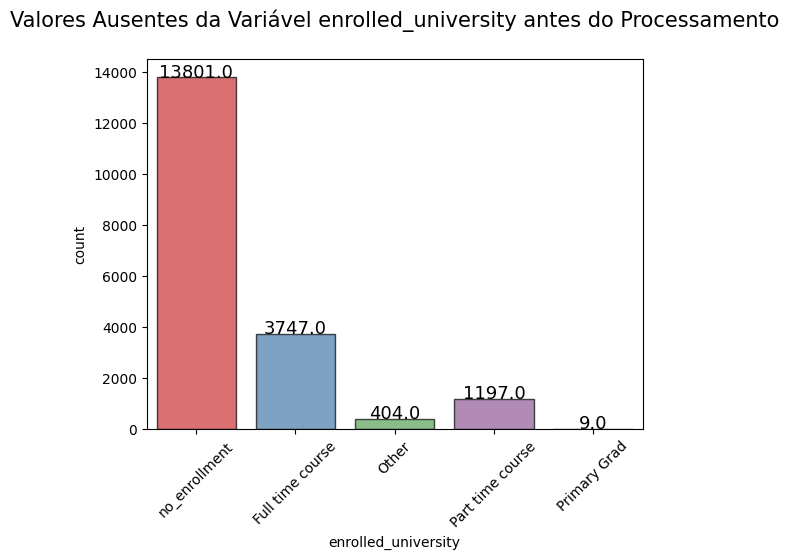

In [154]:
# Valores Ausentes da Variável major_discipline Depois do Processamento

sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black', palette='Set1')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 13)
plt.title("Valores Ausentes da Variável enrolled_university antes do Processamento\n", fontsize = 15)
plt.show()

In [155]:
new_df.sample(10)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
3146,0.738,Has relevent experience,Full time course,Graduate,STEM,3,Pvt Ltd,0.0
7489,0.624,Has relevent experience,no_enrollment,Masters,STEM,3,Pvt Ltd,1.0
12343,0.92,Has relevent experience,no_enrollment,Graduate,STEM,20,Public Sector,0.0
11322,0.866,No relevent experience,Part time course,Masters,STEM,>20,Public Sector,0.0
9627,0.739,Has relevent experience,no_enrollment,Graduate,STEM,8,Pvt Ltd,0.0
1211,0.698,No relevent experience,Full time course,Graduate,STEM,<1,NaN,1.0
14235,0.92,Has relevent experience,no_enrollment,Graduate,Humanities,6,Pvt Ltd,1.0
2290,0.92,Has relevent experience,no_enrollment,Graduate,Humanities,19,Pvt Ltd,1.0
5498,0.92,No relevent experience,no_enrollment,High School,Non Degree,3,NaN,0.0
14807,0.843,No relevent experience,Full time course,High School,Non Degree,3,NaN,0.0


###### Variável company_type

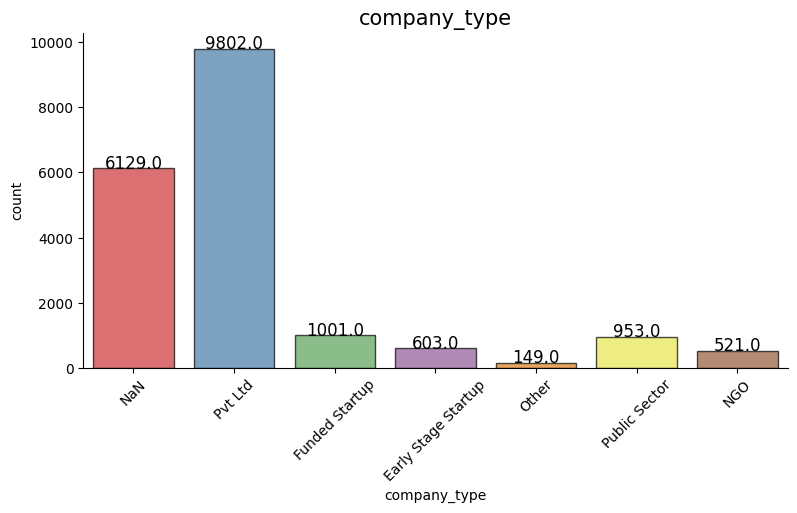

In [160]:
# Plot
plt.figure(figsize = (20, 20))

column_list = ['company_type']

A = 0

for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black', palette = 'Set1')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [163]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

Neste caso não há outra explicação para os valores NaN, então iremos imputar com `Other`

In [164]:
# Índice

nan_index = new_df[(new_df['company_type'].isna())].index

In [165]:
# Imputação dos valores NaN com 'Other'

new_df['company_type'][nan_index] = 'Other'

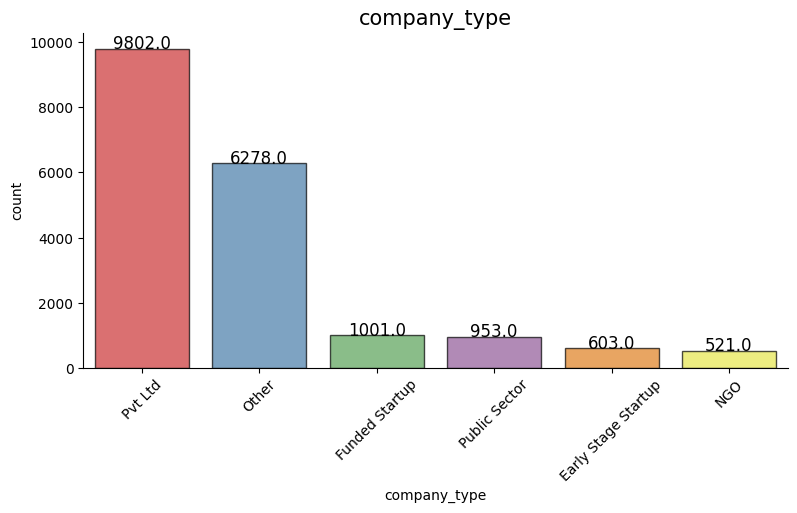

In [169]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7,order = new_df['company_type'].value_counts().index, edgecolor = 'black', palette = 'Set1')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

###### Variável education_level

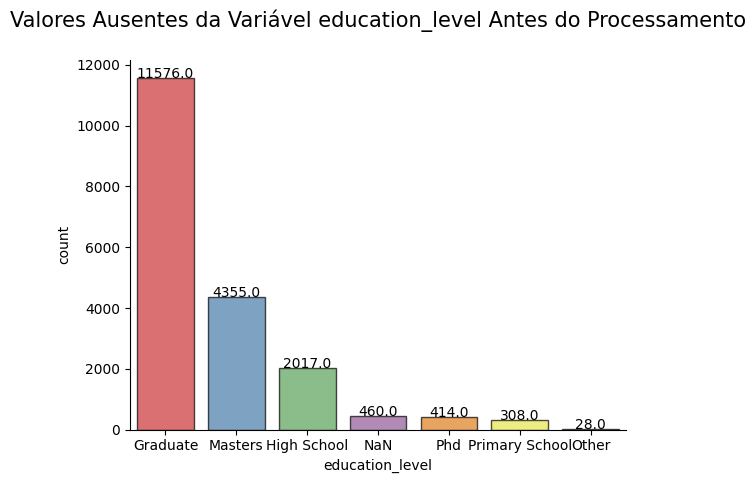

In [171]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black', palette = 'Set1')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [172]:
# Índice

nan_index = new_df[(new_df['education_level'].isna())].index

In [173]:
# Imputação dos valores NaN com 'Other'

new_df['education_level'][nan_index] = 'Other'

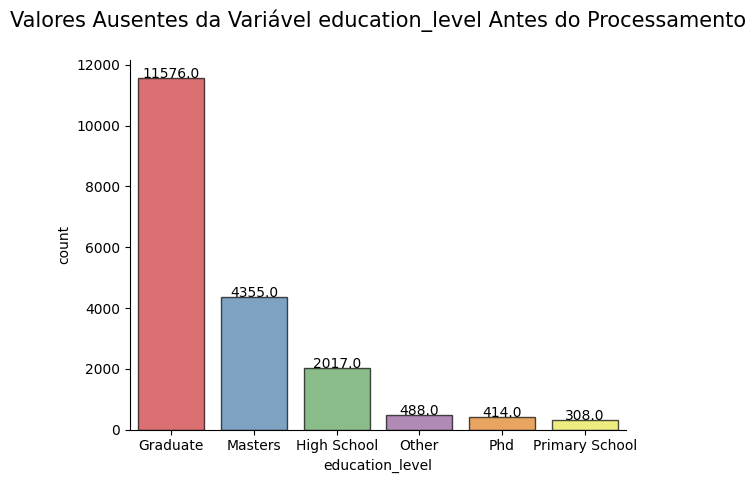

In [174]:
# Plot

sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black', palette = 'Set1')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

###### Variável Experience

In [175]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   relevent_experience     19158 non-null  object
 2   enrolled_university     19158 non-null  object
 3   education_level         19158 non-null  object
 4   major_discipline        19158 non-null  object
 5   experience              19095 non-null  object
 6   company_type            19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [176]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [196]:
# Aplicando engenharia de atributo no novo dataframe

new_df['experience'] = np.where(new_df['experience'] == '<1', 1, new_df['experience'])
new_df['experience'] = np.where(new_df['experience'] == '>20', 21, new_df['experience'])

In [182]:
new_df['experience'].value_counts(dropna = False)

21       3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
1         520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [183]:
# Percentual de valores ausentes

percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.328844
company_type              0.000000
target                    0.000000
dtype: float64

In [184]:
new_df['experience'].isnull().sum()

63

In [185]:
new_df.shape

(19158, 8)

In [186]:
new_df = new_df.dropna()

In [187]:
new_df.shape

(19095, 8)

In [188]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_type              0.0
target                    0.0
dtype: float64

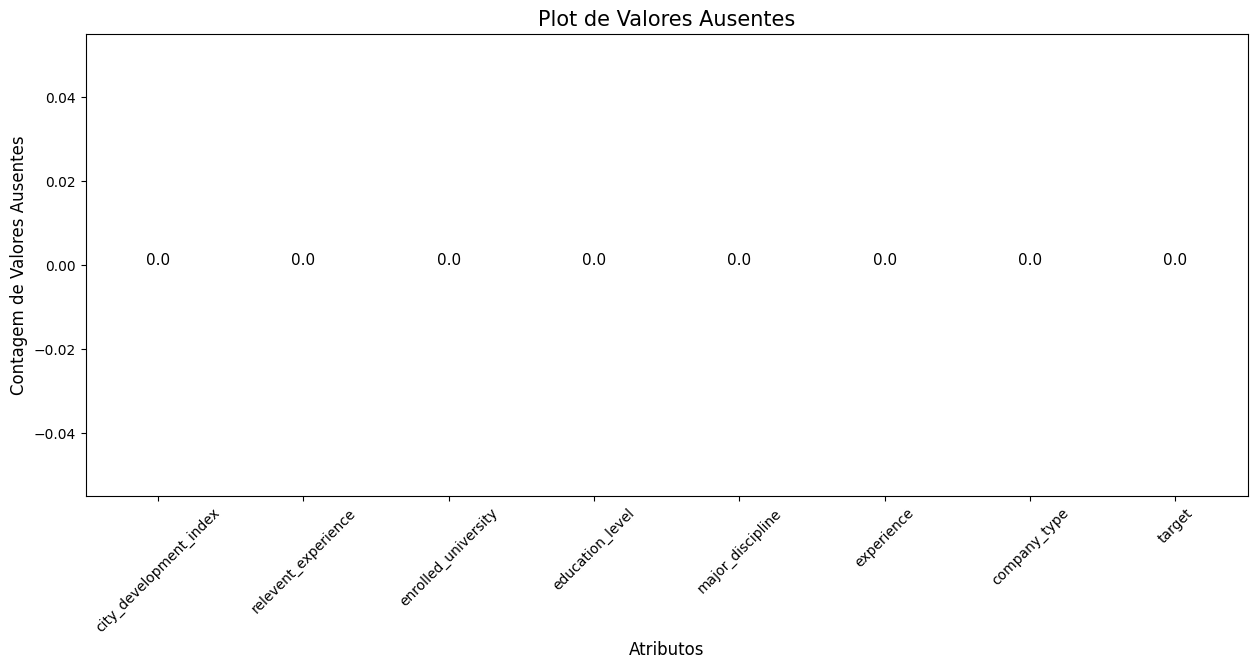

In [190]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x=null_df['index'], y=null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

## Ajustes Finais

In [191]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,21,Other,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Other,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,Funded Startup,0.0


In [192]:
# Ajustando os dados

new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [193]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,No enrollment,Graduate,STEM,21,Other,1.0
1,0.776,No relevent experience,No enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Other,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,1,Pvt Ltd,1.0
4,0.767,Has relevent experience,No enrollment,Masters,STEM,21,Funded Startup,0.0


In [200]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

<p>- As variáveis que mais influenciam na identificação de um bom candidato são:<p>

  - O nível de desenvolvimento da cidade onde o candidato reside.
  - A duração da experiência profissional.
  - Se o candidato está ou não cursando uma graduação.
  - Se o candidato possui ou não experiência relevante.
  - O grau de escolaridade.
  - O ramo de atividade da empresa que o candidato trabalha ou trabalhou anteriormente.
  - A área de formação na graduação (se aplicável).

<p>- As variáveis que não têm relevância para a análise são:<p>

  - O identificador do candidato.
  - O código da cidade do candidato.
  - O sexo.
  - A última vez que o candidato teve um emprego.
  - O porte da empresa (se aplicável).
  - A quantidade de horas de treinamento.

**Sugestões do Analista de Dados**:

- O RH pode criar um método de coleta de dados para obter mais informações que possam melhorar a qualidade dos dados e a precisão da análise.

- O RH pode buscar candidatos que venham de cidades com menor índice de desenvolvimento urbano, sem experiência relevante, com nível superior de educação e com menos experiência de trabalho, pois eles têm mais chances de estar procurando um emprego.

- O RH pode reduzir o tempo de treinamento, pois muitas pessoas não precisam de muito tempo para completar o treinamento.

# Fim